In [1]:
####logistic regression##### 2 classifier coz 2 types of class
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

In [2]:
df2=pd.read_csv('C:\\Users\\Ashok\\prima-indians-diabetes.csv') 

In [3]:
df2.head() #1st row is taken as col name

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [4]:
df1=pd.read_csv('C:\\Users\\Ashok\\Downloads\\prima-indians-diabetes.csv',header=None) 

In [5]:
df1.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
colnames=['Preg','Glu','Bp','Sft','Ins','Bmi','Dpf','Age','Class']
df=pd.read_csv('C:\\Users\\Ashok\\Downloads\\prima-indians-diabetes.csv',names=colnames) #file dosent have headers

In [7]:
df.head()

,Preg,Glu,Bp,Sft,Ins,Bmi,Dpf,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.corr()

,Preg,Glu,Bp,Sft,Ins,Bmi,Dpf,Age,Class
Preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glu,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
Bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
Sft,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Ins,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
Bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
Dpf,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [9]:
#check how many healthy and disease

In [10]:
df.groupby('Class').size()

Class
0    500
1    268
dtype: int64

In [11]:
Xnew=df.drop(['Bp','Sft','Ins','Class'],axis=1)

In [12]:
Xnew.head()

,Preg,Glu,Bmi,Dpf,Age
0,6,148,33.6,0.627,50
1,1,85,26.6,0.351,31
2,8,183,23.3,0.672,32
3,1,89,28.1,0.167,21
4,0,137,43.1,2.288,33


In [13]:
Xnew1=df.drop(['Bp','Sft','Class'],axis=1)

In [14]:
Xnew1.head()

,Preg,Glu,Ins,Bmi,Dpf,Age
0,6,148,0,33.6,0.627,50
1,1,85,0,26.6,0.351,31
2,8,183,0,23.3,0.672,32
3,1,89,94,28.1,0.167,21
4,0,137,168,43.1,2.288,33


In [15]:
#check diabetes  is independent on 'age'

In [16]:
#split

In [17]:
X=df.drop(['Class'],axis=1)
Y=df[['Class']]

In [18]:
import statsmodels.api as sm
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.608498
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.059     
Dependent Variable: Class            AIC:              950.6528  
Date:               2019-05-05 12:06 BIC:              987.8031  
No. Observations:   768              Log-Likelihood:   -467.33   
Df Model:           7                LL-Null:          -496.74   
Df Residuals:       760              LLR p-value:      2.5825e-10
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
Preg       0.1284     0.0286    4.4843   0.0000    0.0723    0.1845
Glu        0.0129     0.0027    4.7568   0.0000    0.0076 

In [19]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.3,random_state=2)

In [20]:
Xtrain.shape

(537, 8)

In [21]:
Ytrain.shape

(537, 1)

In [22]:
Xtest.shape

(231, 8)

In [23]:
Ytest.shape

(231, 1)

In [24]:
df.shape

(768, 9)

In [25]:
model=LogisticRegression()

In [26]:
model.fit(Xtrain,Ytrain)

C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [27]:
ypred=model.predict(Xtest)

In [28]:
#calculating overall accuray

In [29]:
metrics.accuracy_score(Ytest,ypred)

0.7359307359307359

In [30]:
#confusion matric

In [31]:
cm=metrics.confusion_matrix(Ytest,ypred)

In [32]:
cm

array([[138,  17],
       [ 44,  32]], dtype=int64)

In [33]:
Ytest.groupby('Class').size()

Class
0    155
1     76
dtype: int64

In [34]:
#ytest.value_counts()

In [35]:
sensitivity=cm[1,1]/cm[1,:].sum()
sensitivity#TPR

0.42105263157894735

In [36]:
Specificity=cm[0,0]/cm[0,:].sum()
Specificity#TNR

0.8903225806451613

In [37]:
#classification report

In [38]:
report=metrics.classification_report(Ytest,ypred)

In [39]:
print(report)

              precision    recall  f1-score   support

           0       0.76      0.89      0.82       155
           1       0.65      0.42      0.51        76

   micro avg       0.74      0.74      0.74       231
   macro avg       0.71      0.66      0.67       231
weighted avg       0.72      0.74      0.72       231



In [40]:
from sklearn.model_selection import KFold

In [41]:
#x is having all the values
Kf=KFold(n_splits=3,shuffle=True,random_state=2)
acc=[] #empty list for accurayc
#will run for 3 instances, coz split is 3
#each nstance train and test will get updated
#train[3,5,1,6,8,2] test[9,7,4] will just hold the index record numbers #first instance
#in the secodn instance train and test will take diff records
#using index numbers it will fetch the records
for train,test in Kf.split(X,Y):
    Xtrain,Xtest=X.iloc[train,:],X.iloc[test,:]  
    Ytrain,Ytest=Y.iloc[train],Y.iloc[test]
    model=LogisticRegression()
    model.fit(Xtrain,Ytrain)
    Y_predict=model.predict(Xtest)
    acc.append(np.sqrt(metrics.accuracy_score(Ytest,Y_predict)))
print(acc) #acc=[75(1st instance),78(2nd instance),70]
# it will come out of the loop
print("Cross_Validated_Accuracy_score: %0.03f (+/- %0.5f)" % (np.mean(acc),np.var(acc,ddof=1)))
# will take mean and variance of the acc



#based on y pred values, if regression calculate rmse, if log calculate report nal
    
    

[0.8569568250501305, 0.879452954966893, 0.879452954966893]
Cross_Validated_Accuracy_score: 0.872 (+/- 0.00017)


C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\linear_

In [42]:
#xnew is the input
Kf=KFold(n_splits=3,shuffle=True,random_state=2)
acc=[] #empty list for accurayc
#will run for 3 instances, coz split is 3
#each nstance train and test will get updated
#train[3,5,1,6,8,2] test[9,7,4] will just hold the index record numbers #first instance
#in the secodn instance train and test will take diff records
#using index numbers it will fetch the records
for train,test in Kf.split(Xnew,Y):
    Xtrain,Xtest=Xnew.iloc[train,:],Xnew.iloc[test,:]  
    Ytrain,Ytest=Y.iloc[train],Y.iloc[test]
    model=LogisticRegression()
    model.fit(Xtrain,Ytrain)
    Y_predict=model.predict(Xtest)
    acc.append(np.sqrt(metrics.accuracy_score(Ytest,Y_predict)))
print(acc) #acc=[75(1st instance),78(2nd instance),70]
# it will come out of the loop
print("Cross_Validated_Accuracy_score: %0.03f (+/- %0.5f)" % (np.mean(acc),np.var(acc,ddof=1)))
# will take mean and variance of the acc



#based on y pred values, if regression calculate rmse, if log calculate report nal
    
    

C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0.8477912478906585, 0.879452954966893, 0.879452954966893]
Cross_Validated_Accuracy_score: 0.869 (+/- 0.00033)


C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [43]:
#sensitivy score

In [44]:
#xnew is the input
Kf=KFold(n_splits=3,shuffle=True,random_state=2)
tpr=[] 
#average sensitivity
for train,test in Kf.split(Xnew,Y):
    Xtrain,Xtest=Xnew.iloc[train,:],Xnew.iloc[test,:]  
    Ytrain,Ytest=Y.iloc[train],Y.iloc[test]
    model=LogisticRegression()
    model.fit(Xtrain,Ytrain)
    Y_predict=model.predict(Xtest)
    #acc.append(np.sqrt(metrics.accuracy_score(Ytest,Y_predict)))
    cm=metrics.confusion_matrix(Ytest,Y_predict)
    tpr.append(cm[1,1]/cm[1,:].sum())
    #print(cm)
print(tpr) 
print("Cross_Validated_Sensitivity_score: %0.03f (+/- %0.5f)" % (np.mean(tpr),np.var(tpr,ddof=1)))
# will take mean and variance of the acc



#based on y pred values, if regression calculate rmse, if log calculate report nal
    
    

[0.42168674698795183, 0.5494505494505495, 0.5531914893617021]
Cross_Validated_Sensitivity_score: 0.508 (+/- 0.00561)


C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\linear_

In [45]:
#x is having all the values
Kf=KFold(n_splits=3,shuffle=True,random_state=2)
tpr=[] #empty list for accurayc
for train,test in Kf.split(X,Y):
    Xtrain,Xtest=X.iloc[train,:],X.iloc[test,:]  
    Ytrain,Ytest=Y.iloc[train],Y.iloc[test]
    model=LogisticRegression()
    model.fit(Xtrain,Ytrain)
    Y_predict=model.predict(Xtest)
    #acc.append(np.sqrt(metrics.accuracy_score(Ytest,Y_predict)))
    cm=metrics.confusion_matrix(Ytest,Y_predict)
    tpr.append(cm[1,1]/cm[1,:].sum())
    #print(cm)
print(tpr) #acc=[75(1st instance),78(2nd instance),70]
# it will come out of the loop
print("Cross_Validated_Sensitivity_score: %0.03f (+/- %0.5f)" % (np.mean(tpr),np.var(tpr,ddof=1)))
# will take mean and variance of the acc



#based on y pred values, if regression calculate rmse, if log calculate report nal
    
    

[0.43373493975903615, 0.5604395604395604, 0.5425531914893617]
Cross_Validated_Sensitivity_score: 0.512 (+/- 0.00470)


C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\linear_

In [46]:
#xnew1 is the input
Kf=KFold(n_splits=3,shuffle=True,random_state=2)
acc=[] #empty list for accurayc
#will run for 3 instances, coz split is 3
#each nstance train and test will get updated
#train[3,5,1,6,8,2] test[9,7,4] will just hold the index record numbers #first instance
#in the secodn instance train and test will take diff records
#using index numbers it will fetch the records
for train,test in Kf.split(Xnew1,Y):
    Xtrain,Xtest=Xnew1.iloc[train,:],Xnew1.iloc[test,:]  
    Ytrain,Ytest=Y.iloc[train],Y.iloc[test]
    model=LogisticRegression()
    model.fit(Xtrain,Ytrain)
    Y_predict=model.predict(Xtest)
    acc.append(np.sqrt(metrics.accuracy_score(Ytest,Y_predict)))
print(acc) #acc=[75(1st instance),78(2nd instance),70]
# it will come out of the loop
print("Cross_Validated_Accuracy_score: %0.03f (+/- %0.5f)" % (np.mean(acc),np.var(acc,ddof=1)))
# will take mean and variance of the acc



#based on y pred values, if regression calculate rmse, if log calculate report nal
    
    

[0.8477912478906585, 0.879452954966893, 0.8882919002219934]
Cross_Validated_Accuracy_score: 0.872 (+/- 0.00045)


C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\linear_

In [47]:
#x is having all the values
Kf=KFold(n_splits=3,shuffle=True,random_state=2)
tpr=[] #empty list for accurayc
for train,test in Kf.split(Xnew1,Y):
    Xtrain,Xtest=Xnew1.iloc[train,:],Xnew1.iloc[test,:]  
    Ytrain,Ytest=Y.iloc[train],Y.iloc[test]
    model=LogisticRegression()
    model.fit(Xtrain,Ytrain)
    Y_predict=model.predict(Xtest)
    #acc.append(np.sqrt(metrics.accuracy_score(Ytest,Y_predict)))
    cm=metrics.confusion_matrix(Ytest,Y_predict)
    tpr.append(cm[1,1]/cm[1,:].sum())
    #print(cm)
print(tpr) #acc=[75(1st instance),78(2nd instance),70]
# it will come out of the loop
print("Cross_Validated_Sensitivity_score: %0.03f (+/- %0.5f)" % (np.mean(tpr),np.var(tpr,ddof=1)))
# will take mean and variance of the acc



#based on y pred values, if regression calculate rmse, if log calculate report nal
    
    

[0.40963855421686746, 0.5494505494505495, 0.5638297872340425]
Cross_Validated_Sensitivity_score: 0.508 (+/- 0.00725)


C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\linear_

In [48]:
(0.515-0.512)/0.515 #BE

0.005825242718446607

In [49]:
(0.00658-0.00470)/0.00658 #VE

0.2857142857142857

In [50]:
####AUC ######

In [51]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.3,random_state=2)

In [52]:
LR1=LogisticRegression()
LR1.fit(Xtrain,Ytrain)
ypredict1=LR1.predict(Xtest)

C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [53]:
#for auc curve
from sklearn.metrics import roc_curve,auc

In [54]:
import matplotlib.pyplot as plt #for plotting
%matplotlib inline

0.6556876061120543


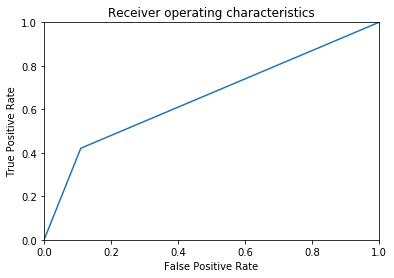

In [55]:
fpr,tpr,_=roc_curve(Ytest,ypredict1)#xaxis will return fpr, yaxis is tpr, dont want other scores so ,_ means will not collect the other values
roc_curve=auc(fpr,tpr)

print(roc_curve)
plt.figure()
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics')
plt.show()


In [56]:
# how to take this inside k-fold validation
#just to compare logitic with someother model, just introduced decision tree

In [57]:
type(X)

pandas.core.frame.DataFrame

In [58]:
X=df.drop(['Class'],axis=1)
Y=df[['Class']]

In [59]:
X.head()

,Preg,Glu,Bp,Sft,Ins,Bmi,Dpf,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [60]:
Y.head()

,Class
0,1
1,0
2,1
3,0
4,1


In [61]:
X.shape

(768, 8)

In [62]:
Y.shape

(768, 1)

In [63]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.3,random_state=2)

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB #NB
from sklearn.metrics import roc_curve,auc
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=0)
NB=GaussianNB

In [65]:
LR=LogisticRegression()
NB=GaussianNB()
DT=DecisionTreeClassifier(random_state=0)

In [66]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc
kf=KFold(n_splits=3,shuffle=True,random_state=2)
for model, name in zip([LR,DT,NB], ['Logistic','DecisionTree','NaiveBayes']):
    roc_auc=[]
    for train,test in kf.split(X,Y):
        Xtrain,Xtest=X.iloc[train,:],X.iloc[test,:]
        Ytrain,Ytest=Y.iloc[train],Y.iloc[test]
        model.fit(Xtrain,Ytrain)
        Y_predict=model.predict(Xtest)
        #cm=metrics.confusion_matrix(Ytest,Y_predict)
        fpr,tpr, _ = roc_curve(Ytest,Y_predict)
        roc_auc.append(auc(fpr, tpr))
    print(roc_auc)
    print("AUC scores: %0.02f (+/- %0.5f) [%s]" % (np.mean(roc_auc), np.var(roc_auc,ddof=1), name ))   
    

[0.656173828261021, 0.7256743256743257, 0.7249802994483845]
AUC scores: 0.70 (+/- 0.00159) [Logistic]
[0.6436729577268612, 0.6455544455544455, 0.6757945889151563]
AUC scores: 0.66 (+/- 0.00032) [DecisionTree]
[0.698586252524549, 0.727006327006327, 0.7425137903861309]
AUC scores: 0.72 (+/- 0.00050) [NaiveBayes]


C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ashok\Anaconda3\lib\site-packages\sklearn\linear_

In [68]:
X.head()

,Preg,Glu,Bp,Sft,Ins,Bmi,Dpf,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [69]:
Y.head()

,Class
0,1
1,0
2,1
3,0
4,1


In [70]:
import statsmodels.api as sm
model=sm.Logit(Y,X)
result=model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.608498
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Sun, 05 May 2019   Pseudo R-squ.:                 0.05922
Time:                        12:07:13   Log-Likelihood:                -467.33
converged:                       True   LL-Null:                       -496.74
                                        LLR p-value:                 2.583e-10
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Preg           0.1284      0.029      4.484      0.000       0.072       0.185
Glu            0.0129      0.